# # CTR - the number of unique users who click atleast once divided by the number of unique visitors who view the page.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

In [3]:
df = pd.read_csv('course_page_actions.csv')
df.head()

,timestamp,id,group,action,duration
0,2016-09-24 17:14:52.012145,261869,experiment,view,130.545004
1,2016-09-24 18:45:09.645857,226546,experiment,view,159.862440
2,2016-09-24 19:16:21.002533,286353,experiment,view,79.349315
3,2016-09-24 19:43:06.927785,842279,experiment,view,55.536126
4,2016-09-24 21:08:22.790333,781883,experiment,view,204.322437


In [4]:
# Get dataframe with all records from control group
control_df = df.query('group == "control"')

# Compute click through rate for control group
control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()

# Display click through rate
control_ctr

0.2364438839848676

In [5]:
# Get dataframe with all records from experiment group
experiment_df = df.query('group == "experiment"')

# Compute click through rate for experiment group
experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()

# Display click through rate
experiment_ctr

0.2668693009118541

In [6]:
# Compute the observed difference in click through rates
obs_diff = experiment_ctr - control_ctr

# Display observed difference
obs_diff

0.030425416926986526

In [8]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    control_df = b_samp.query('group == "control"')
    experiment_df = b_samp.query('group == "experiment"')
    control_ctr = control_df.query('action == "enroll"').id.nunique() / control_df.query('action == "view"').id.nunique()
    experiment_ctr = experiment_df.query('action == "enroll"').id.nunique() / experiment_df.query('action == "view"').id.nunique()
    diffs.append(experiment_ctr - control_ctr)


In [9]:
# Convert to numpy array
diffs = np.array(diffs)

# Plot sampling distribution
plt.hist(diffs);

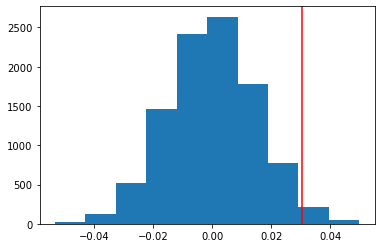

In [12]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)

# Plot the null distribution # Plot observed statistic with the null distibution
plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [11]:
# Compute p-value
(null_vals > obs_diff).mean()


0.0188

# Metric - Average Reading Duration

In [13]:
views = df.query('action == "view"')

In [14]:
reading_times = views.groupby(['id', 'group'])['duration'].mean()

In [16]:
reading_times.head()

id      group     
183260  control       107.331484
183615  experiment     24.627594
184277  experiment    193.212489
184360  experiment    226.586283
184589  experiment     12.052097
Name: duration, dtype: float64

In [17]:
reading_times = reading_times.reset_index()

In [18]:
reading_times.head()

,id,group,duration
0,183260,control,107.331484
1,183615,experiment,24.627594
2,184277,experiment,193.212489
3,184360,experiment,226.586283
4,184589,experiment,12.052097


In [21]:
control_mean = df.query('group == "control"')['duration'].mean()
control_mean

115.40710650582038

In [22]:
experiment_mean = df.query('group == "experiment"')['duration'].mean()
experiment_mean

130.93220512539477

In [24]:
obs_diff = experiment_mean - control_mean
obs_diff

15.525098619574393

In [29]:
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"')['duration'].mean()
    experiment_mean = b_samp.query('group == "experiment"')['duration'].mean()
    diffs.append(experiment_mean - control_mean)

In [30]:
diffs = np.array(diffs)

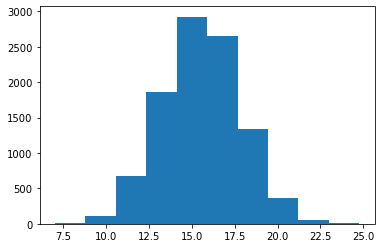

In [31]:
plt.hist(diffs);

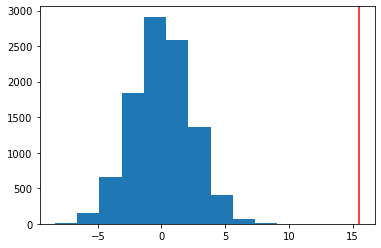

In [32]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)

plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

# Metric - Average Classroom Time

In [43]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [36]:
# The total_days represents the total amount of time
# each student has spent in classroom.
# get the average classroom time for control group
control_mean = df.query('group == "control"').total_days.mean()

# get the average classroom time for experiment group
experiment_mean = df.query('group == "experiment"').total_days.mean()

# display average classroom time for each group
control_mean, experiment_mean

(73.36899038461539, 74.6715935334873)

In [37]:
# compute observed difference in classroom time
obs_diff = experiment_mean - control_mean

# display observed difference
obs_diff

1.3026031488719099

In [38]:
# create sampling distribution of difference in average classroom times
# with boostrapping
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"').total_days.mean()
    experiment_mean = b_samp.query('group == "experiment"').total_days.mean()
    diffs.append(experiment_mean - control_mean)

In [39]:
# convert to numpy array
diffs = np.array(diffs)

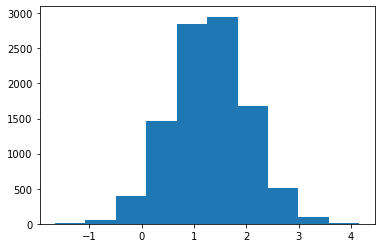

In [40]:
# plot sampling distribution
plt.hist(diffs);

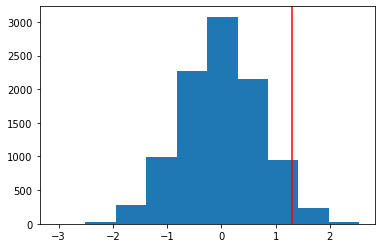

In [41]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)

plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [42]:
# compute p value
(null_vals > obs_diff).mean()

0.0368

# Metric - Completion Rate

In [56]:
df = pd.read_csv('classroom_actions.csv')
df.head()

,timestamp,id,group,total_days,completed
0,2015-08-10 17:06:01.032740,610019,experiment,97,True
1,2015-08-10 17:15:28.950975,690224,control,75,False
2,2015-08-10 17:34:40.920384,564994,experiment,128,True
3,2015-08-10 17:50:39.847374,849588,experiment,66,False
4,2015-08-10 19:10:40.650599,849826,experiment,34,False


In [57]:
# Create dataframe with all control records
control_df = df.query('group == "control"')

# Compute completion rate
control_cr = control_df.completed.mean()

# Display completion rate
control_cr

0.3719951923076923

In [58]:
# Create dataframe with all experiment records
experiment_df = df.query('group == "experiment"')

# Compute completion rate
experiment_ctr = experiment_df.completed.mean()

# Display completion rate
experiment_ctr

0.3935334872979215

In [59]:
# Compute observed difference in completion rates
obs_diff = experiment_ctr - control_cr

# Display observed difference in completion rates
obs_diff

0.02153829499022919

In [60]:
# Create sampling distribution for difference in completion rates
# with boostrapping
diffs = []
for _ in range(10000):
    b_samp = df.sample(df.shape[0], replace=True)
    control_mean = b_samp.query('group == "control"').completed.mean()
    experiment_mean = b_samp.query('group == "experiment"').completed.mean()
    diffs.append(experiment_mean - control_mean)

In [61]:
# convert to numpy array
diffs = np.array(diffs)

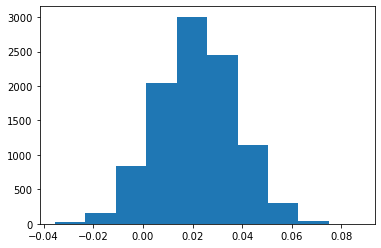

In [62]:
# plot distribution
plt.hist(diffs);

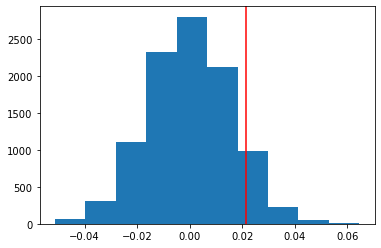

In [63]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)

plt.hist(null_vals);
plt.axvline(obs_diff, c='red')

In [64]:
# compute p value
(null_vals > obs_diff).mean()

0.0881